<div align='left'>
<img src="https://t3.ftcdn.net/jpg/07/07/05/36/360_F_707053629_ZBEe0ujcsuvX9VtyM8UuOOHfImjuicJP.jpg">
</div>

## <div style= "font-family: serif; font-weight:bold; letter-spacing: 0px; color:white; font-size:100%; text-align:left;padding:3.0px; background: #3D8DC9; border-bottom: 8px solid navy" > ML OLYMPIAD | SMOKING DETECTION IN PATIENTS <br> <div> 

##### **Overview**

It's widely recognized that smoking detrimentally impacts health, affecting nearly every bodily organ, leading to numerous diseases, and shortening the lifespan of smokers. By 2018, it emerged as the foremost cause of preventable deaths and illnesses globally, posing a significant challenge to global health.

A report by the World Health Organization anticipates that smoking-related fatalities will escalate to 10 million by 2030.

In response to this, evidence-based interventions for aiding smoking cessation have been recommended and implemented, yet success rates have been modest, with less than a third of those attempting cessation achieving long-term abstinence. Many healthcare providers find smoking cessation counseling to be inefficient and overly time-consuming, often neglecting to incorporate it into routine care. To address this issue, certain criteria have been suggested to help identify smokers more likely to successfully quit. These include factors like nicotine dependency levels, exhaled carbon monoxide levels, daily cigarette consumption, age of smoking onset, history of quit attempts, marital status, emotional well-being, personality traits, and motivation levels. Nonetheless, employing these criteria individually for predicting quitting success has proven complex, yielding inconsistent outcomes difficult for both doctors and patients to navigate.

The solution might lie in developing a predictive model that could accurately forecast an individual smoker's likelihood of quitting. Recent advancements in machine learning have facilitated the creation of health outcome prediction models.

##### **Evaluation**

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.


##### **Citation**

Rishiraj Acharya. (2024). ML Olympiad - Smoking Detection in Patients. Kaggle. https://kaggle.com/competitions/ml-olympiad-smoking

# <div style= "font-family: serif; font-weight:bold; letter-spacing: 0px; color:white; font-size:70%; text-align:left;padding:3.0px; background: #3D8DC9; border-bottom: 6px solid navy" > 1. IMPORTS <br> <div> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ww

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

ww.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='viridis')

# <div style= "font-family: serif; font-weight:bold; letter-spacing: 0px; color:white; font-size:70%; text-align:left;padding:3.0px; background: #3D8DC9; border-bottom: 6px solid navy" > 2. LOAD DATA <br> <div> 

In [2]:
train = pd.read_csv(r"C:\FCD\Competicoes_Kaggle\008_ML_Olympiad_Smoke_Prediction\train.csv")
test = pd.read_csv(r"C:\FCD\Competicoes_Kaggle\008_ML_Olympiad_Smoke_Prediction\test.csv")

# <div style= "font-family: serif; font-weight:bold; letter-spacing: 0px; color:white; font-size:70%; text-align:left;padding:3.0px; background: #3D8DC9; border-bottom: 6px solid navy" > 3. EXPLORY DATA ANALYSIS (EDA) <br> <div> 

In [3]:
# checking shape of datasets
print(f'train shape: {train.shape}')
print(f'test shape: {test.shape}')

train shape: (159256, 24)
test shape: (106171, 23)


In [4]:
# checking duplicated values
print(f'train duplicated: {train.duplicated().sum()}')

train duplicated: 0


In [5]:
# checking missing values
print(f'train missing values: {train.isna().sum().sum()}')

train missing values: 0


In [6]:
# checking data types
train.dtypes

id                       int64
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
Urine protein            int64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dental caries            int64
smoking                  int64
dtype: object

In [7]:
# sample
train.sample(5)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
31836,31836,40,165,70,84.0,1.2,1.0,1,1,135,...,39,142,11.7,1,0.6,15,13,22,0,0
120072,120072,55,160,60,84.0,1.2,1.0,1,1,125,...,57,128,17.1,1,0.8,26,19,20,0,1
5682,5682,50,160,50,67.0,0.6,1.0,1,1,118,...,70,135,13.5,1,0.6,19,11,10,0,0
59998,59998,40,160,60,76.0,1.5,1.5,1,1,120,...,78,76,13.7,1,0.5,19,14,7,0,0
114074,114074,50,165,65,82.0,1.0,0.8,1,1,132,...,52,119,15.1,1,1.0,22,17,15,0,0


In [8]:
features = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries']
len(features)

22

In [9]:
# summary statistical
train[features].describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
age,159256.0,44.3,11.8,20.0,40.0,40.0,55.0,85.0
height(cm),159256.0,165.3,8.8,135.0,160.0,165.0,170.0,190.0
weight(kg),159256.0,67.1,12.6,30.0,60.0,65.0,75.0,130.0
waist(cm),159256.0,83.0,9.0,51.0,77.0,83.0,89.0,127.0
eyesight(left),159256.0,1.0,0.4,0.1,0.8,1.0,1.2,9.9
eyesight(right),159256.0,1.0,0.4,0.1,0.8,1.0,1.2,9.9
hearing(left),159256.0,1.0,0.2,1.0,1.0,1.0,1.0,2.0
hearing(right),159256.0,1.0,0.2,1.0,1.0,1.0,1.0,2.0
systolic,159256.0,122.5,12.7,77.0,114.0,121.0,130.0,213.0
relaxation,159256.0,76.9,9.0,44.0,70.0,78.0,82.0,133.0


**INSIGHTS**

If we calculate the IQR for each variable and multiply by three (statistical starting point for identifying extreme values), we observe that all variables present outliers, but what do we do with these values? We will not immediately remove them, so that we can evaluate their influence on the target variable and impact on the models' prediction performance.

In [10]:
# checking correlations
train.corr().style.background_gradient(cmap='Blues').highlight_between(left=0.8, right=.99, color='red')

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
id,1.000000,-0.003724,0.000710,-0.001656,-0.003491,0.002325,0.001222,-0.003876,-0.003448,0.000107,0.000119,0.000618,-0.001530,-0.001875,0.003049,-0.003059,0.000834,-0.000900,-0.001278,0.000685,-0.000270,0.006935,-0.001382,-0.000632
age,-0.003724,1.000000,-0.489608,-0.336859,-0.045369,-0.269495,-0.277638,0.212889,0.212972,0.160437,0.064924,0.191913,0.106873,-0.038063,0.041411,0.103529,-0.280851,-0.004526,-0.143808,0.036595,-0.131419,-0.046879,-0.120556,-0.206033
height(cm),0.000710,-0.489608,1.000000,0.686645,0.409500,0.209997,0.216729,-0.090110,-0.091760,0.062297,0.114390,0.017516,-0.113455,0.252464,-0.303450,-0.080001,0.568739,-0.015097,0.459654,0.059126,0.222305,0.218809,0.100585,0.447111
weight(kg),-0.001656,-0.336859,0.686645,1.000000,0.830208,0.151794,0.161344,-0.069761,-0.070679,0.241495,0.265921,0.132409,0.020382,0.384313,-0.438224,0.059438,0.527259,-0.028537,0.391769,0.160221,0.376899,0.290996,0.091375,0.351748
waist(cm),-0.003491,-0.045369,0.409500,0.830208,1.000000,0.046964,0.055094,0.004759,0.006637,0.306150,0.291389,0.209541,0.075039,0.394593,-0.449219,0.114552,0.418245,-0.029491,0.294176,0.185690,0.359736,0.294166,0.053575,0.262715
eyesight(left),0.002325,-0.269495,0.209997,0.151794,0.046964,1.000000,0.448945,-0.067788,-0.070379,-0.030718,0.010324,-0.048066,-0.014211,0.057775,-0.043069,-0.018312,0.134314,-0.011633,0.089165,-0.000032,0.063819,0.041759,0.020019,0.100420
eyesight(right),0.001222,-0.277638,0.216729,0.161344,0.055094,0.448945,1.000000,-0.072888,-0.078285,-0.026931,0.017073,-0.047424,-0.011569,0.063572,-0.047384,-0.016913,0.140602,-0.011213,0.087232,0.007967,0.073843,0.052901,0.024314,0.109781
hearing(left),-0.003876,0.212889,-0.090110,-0.069761,0.004759,-0.067788,-0.072888,1.000000,0.553312,0.041887,-0.011739,0.025334,-0.029430,-0.035088,-0.004135,-0.011467,-0.051724,-0.007248,-0.009447,-0.003497,-0.036896,-0.021820,-0.019155,-0.038219
hearing(right),-0.003448,0.212972,-0.091760,-0.070679,0.006637,-0.070379,-0.078285,0.553312,1.000000,0.041790,-0.015248,0.024982,-0.029276,-0.034343,-0.003311,-0.012463,-0.049649,-0.004164,-0.009263,-0.001232,-0.036679,-0.017286,-0.016100,-0.036858
systolic,0.000107,0.160437,0.062297,0.241495,0.306150,-0.030718,-0.026931,0.041887,0.041790,1.000000,0.753003,0.176127,0.069044,0.161187,-0.116457,0.052032,0.174904,-0.029040,0.066902,0.092272,0.109954,0.159811,0.018136,0.058642


**INSIGHTS**

The independent variables weight(kg), waist(cm) and Cholesterol, LDL (marked in red in the correlation map above) have a high correlation between them, which highlights the problem of multicollinearity when training the models. We can solve it in a few ways, using the dimensionality reduction technique or simply excluding one of the variables, my choice will be to exclude 2 of these 4 variables. Let's take advantage and delete the id column.

In [11]:
train.drop(columns=['id', 'waist(cm)', 'LDL'], inplace=True)
test.drop(columns=['id', 'waist(cm)', 'LDL'], inplace=True)

In [12]:
features = ['age', 'height(cm)', 'weight(kg)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries']
len(features)

20

**NOTE**

Let's check outilers that have more than three zscores.

In [13]:
from scipy import stats
register = np.array([True] * len(train))
for col in features:
	zscore = abs(stats.zscore(train[col]))
	register = (zscore < 3) & register

In [14]:
print(f'percent of outliers in dataset: {len(train[register==False]) / len(train) * 100:.2f}%')

percent of outliers in dataset: 12.68%


**INSIGHT**

12.68% of the training dataset has outliers with more than 3 zscores, we will exclude and then graphically visualize the distribution of the independent and target variables.

In [15]:
train = train[register==True]

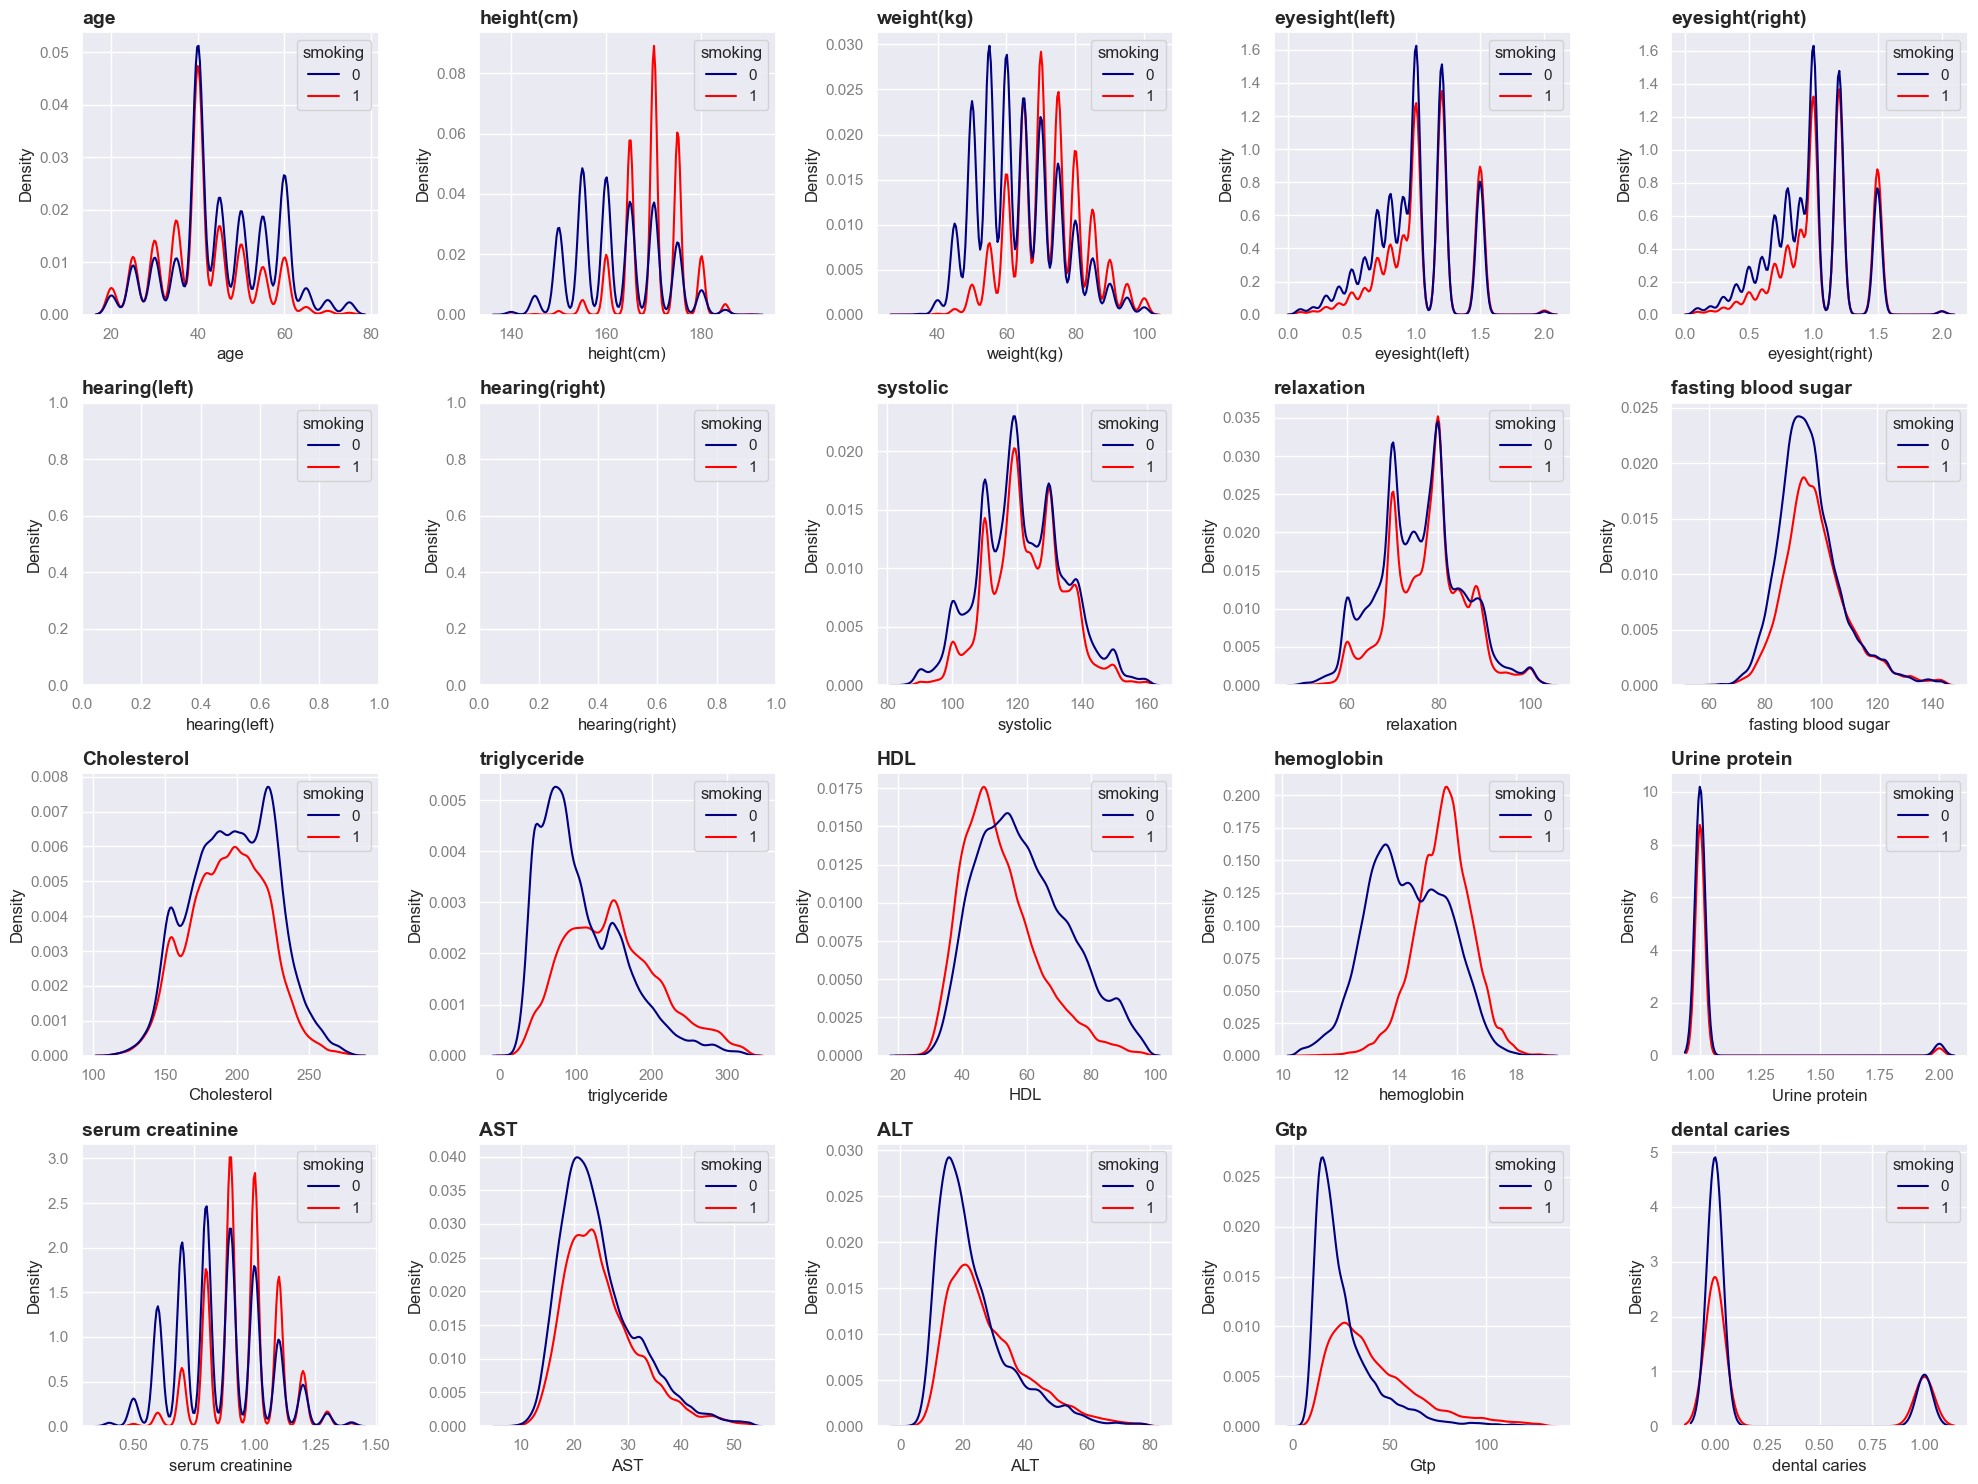

In [16]:
plt.figure(figsize=(20,15))
for col in range(0,len(features)):
	plt.subplot(4,5,col+1)
	sns.kdeplot(train, x=features[col], hue='smoking', palette={0:'navy', 1:'red'})
	plt.title(features[col], weight='bold', loc='left', size=14)
	plt.yticks(color='grey')
	plt.xticks(color='grey')
plt.tight_layout()

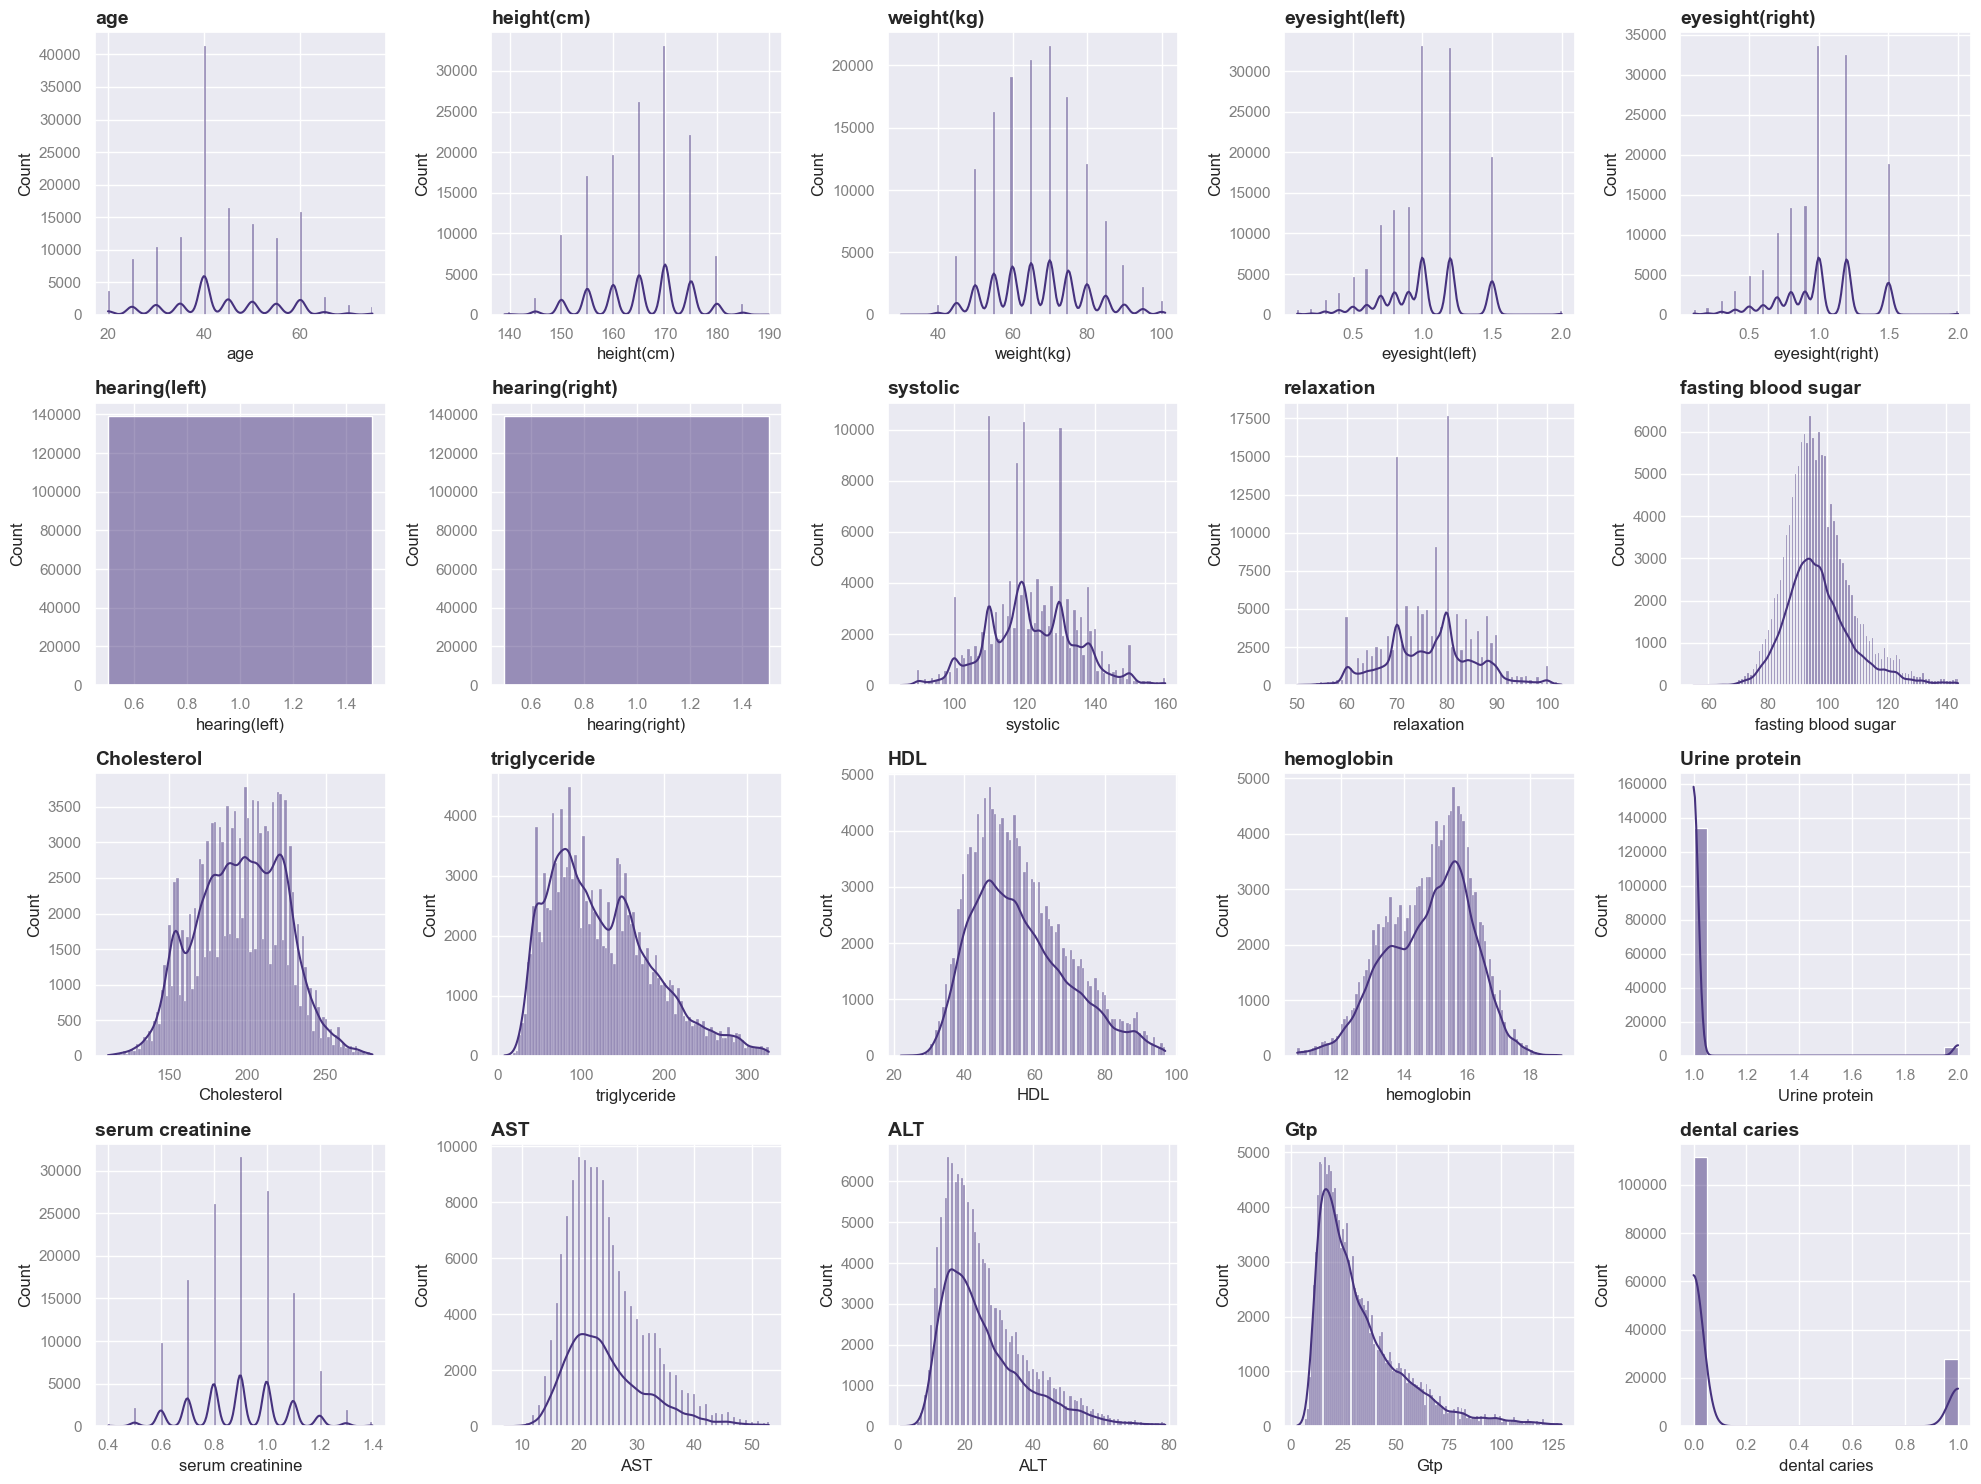

In [17]:
plt.figure(figsize=(20,15))
for col in range(0,len(features)):
	plt.subplot(4,5,col+1)
	sns.histplot(train[features[col]], kde=True)
	plt.title(features[col], weight='bold', loc='left', size=14)
	plt.yticks(color='grey')
	plt.xticks(color='grey')
plt.tight_layout()

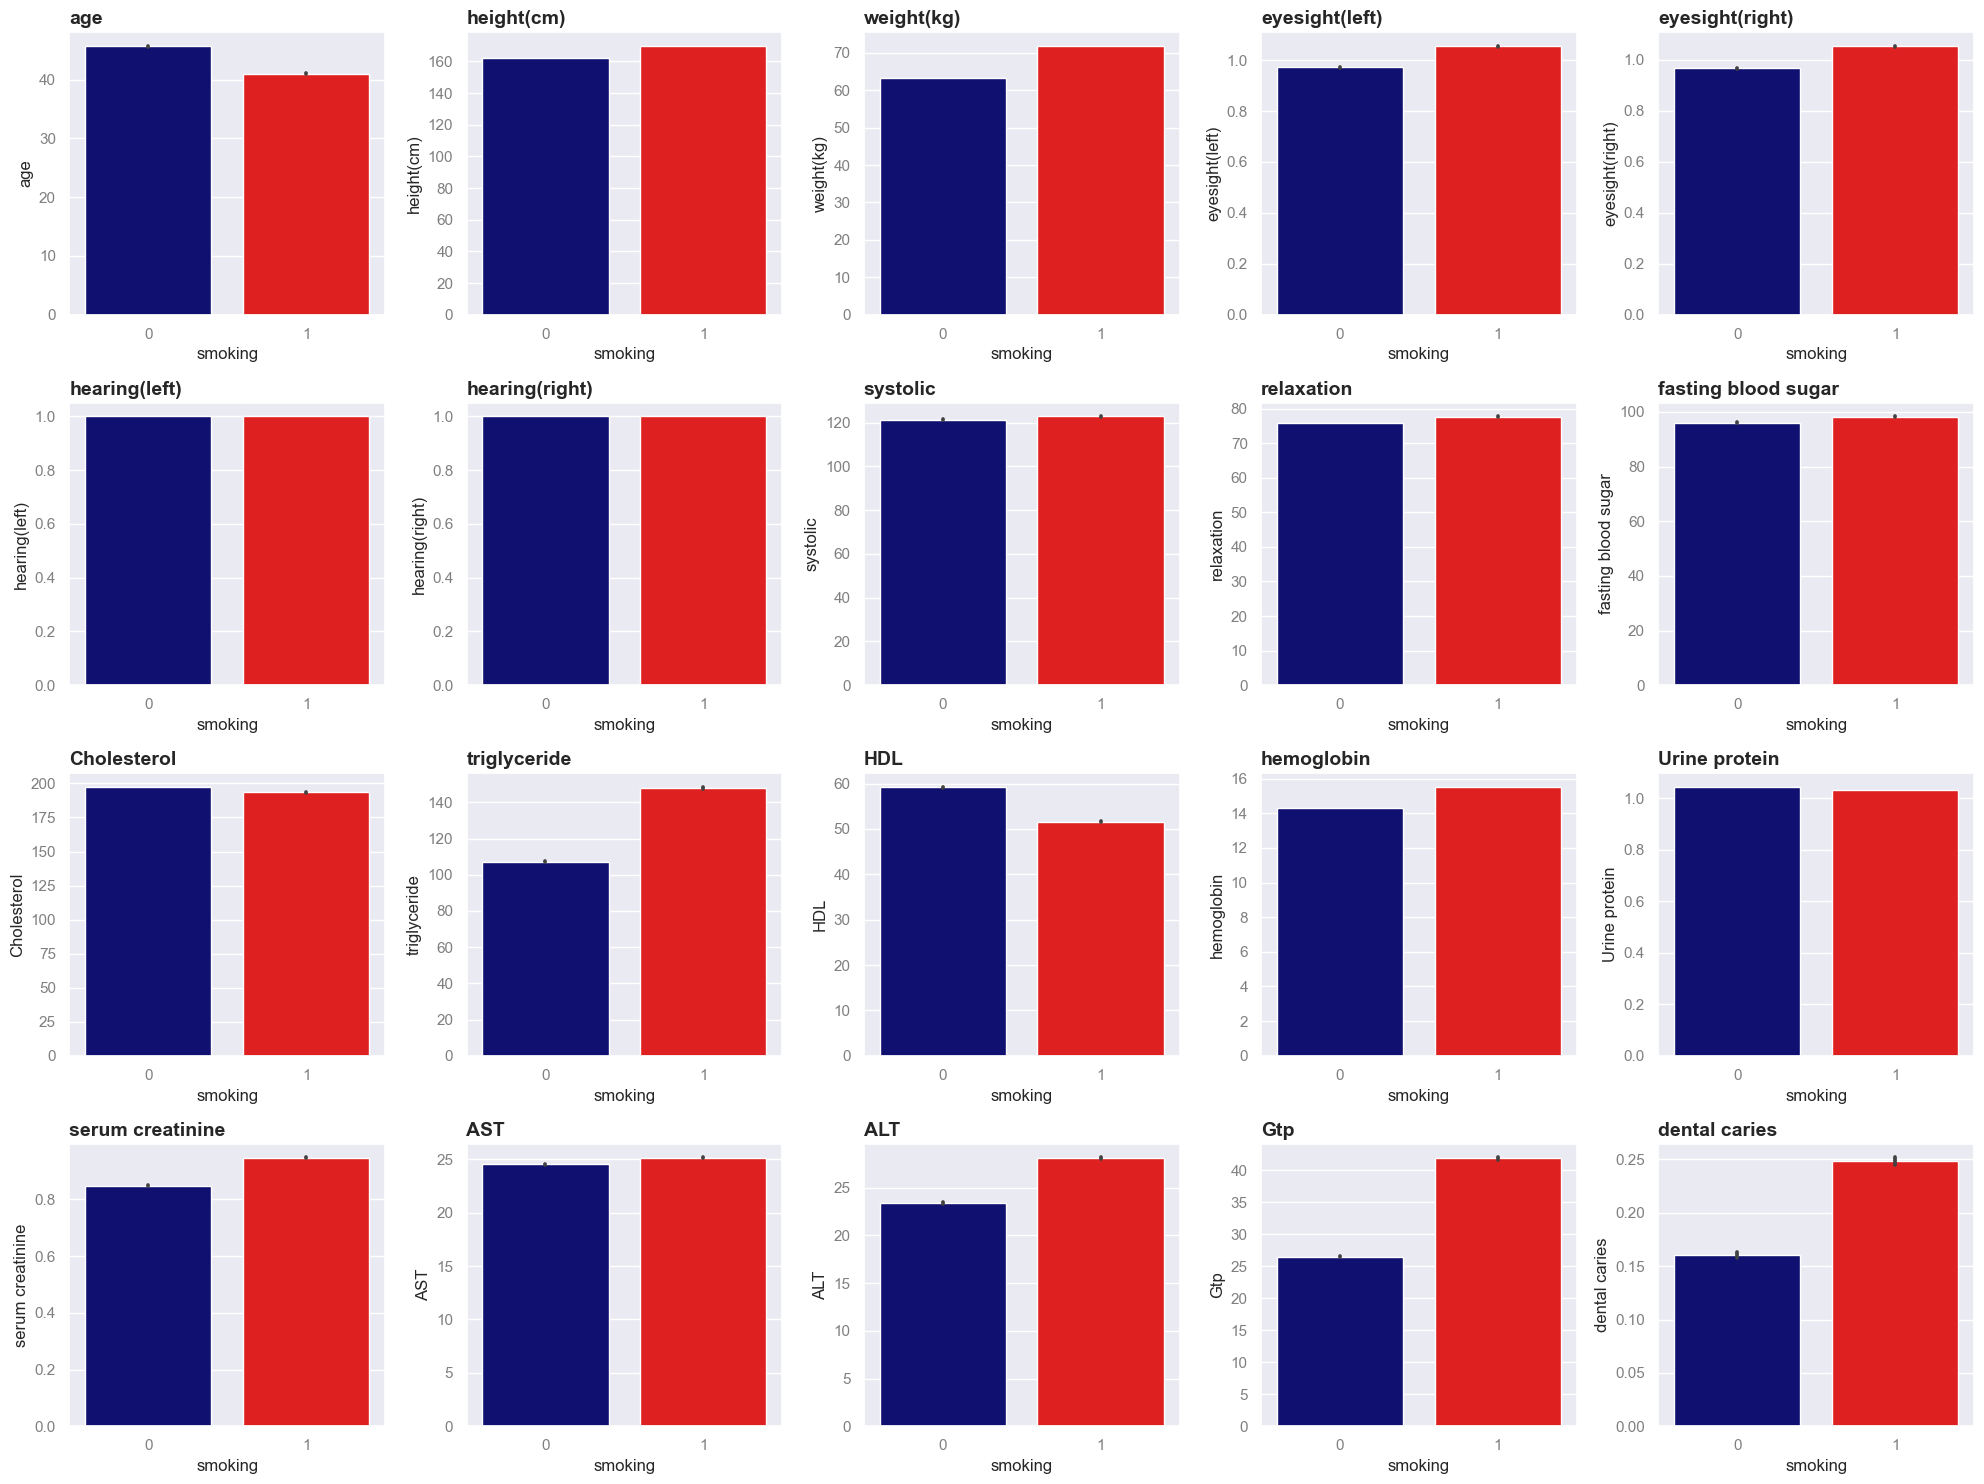

In [18]:
plt.figure(figsize=(20,15))
for col in range(0,len(features)):
	plt.subplot(4,5,col+1)
	sns.barplot(train, y=features[col], x='smoking', palette={0:'navy', 1:'red'})
	plt.title(features[col], weight='bold', loc='left', size=14)
	plt.yticks(color='grey')
	plt.xticks(color='grey')
plt.tight_layout()

**INSIGHT**

By eliminating outliers, the data tends to have normal (or less asymmetric) distributions and is more balanced with the target variable, which improves the learning and generalization of models.

# <div style= "font-family: serif; font-weight:bold; letter-spacing: 0px; color:white; font-size:70%; text-align:left;padding:3.0px; background: #3D8DC9; border-bottom: 6px solid navy" > 4. PRE-PROCESS <br> <div> 

In [19]:
# Split the data into training and testing sets
X = train.drop('smoking', axis=1)
Y = train['smoking']
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=.80, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(111248, 20) (111248,) (27812, 20) (27812,)


In [20]:
# normalize independent training and test features

# features to normalizer
to_normalizer = ['age', 'height(cm)', 'weight(kg)', 'eyesight(left)', 'eyesight(right)',
       'hearing(left)', 'hearing(right)', 'systolic', 'relaxation',
       'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL',
       'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp',
       'dental caries']

# normalizer
Normalizer = MinMaxScaler().fit(x_train)
x_train[to_normalizer] = Normalizer.transform(x_train)
x_test[to_normalizer] = Normalizer.transform(x_test)

# sample after normalizer
x_train.sample(5)

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
145785,0.454545,0.705882,0.563380,0.473684,0.473684,0.0,0.0,0.266667,0.283019,0.359551,0.550296,0.301887,0.440000,0.607143,0.0,0.6,0.590909,0.397436,0.087302,0.0
68778,0.636364,0.215686,0.352113,0.263158,0.368421,0.0,0.0,0.280000,0.396226,0.460674,0.644970,0.166667,0.933333,0.380952,0.0,0.1,0.340909,0.333333,0.087302,0.0
119789,0.363636,0.313725,0.422535,0.368421,0.368421,0.0,0.0,0.173333,0.188679,0.370787,0.733728,0.210692,0.746667,0.250000,0.0,0.4,0.363636,0.217949,0.111111,0.0
56828,0.090909,0.509804,0.563380,0.578947,0.473684,0.0,0.0,0.493333,0.471698,0.483146,0.680473,0.430818,0.440000,0.369048,0.0,0.6,0.204545,0.320513,0.103175,0.0
142102,0.272727,0.705882,0.704225,0.368421,0.473684,0.0,0.0,0.466667,0.566038,0.550562,0.538462,0.628931,0.280000,0.571429,0.0,0.5,0.295455,0.358974,0.285714,0.0


# <div style= "font-family: serif; font-weight:bold; letter-spacing: 0px; color:white; font-size:70%; text-align:left;padding:3.0px; background: #3D8DC9; border-bottom: 6px solid navy" > 5. TRAINING AND EVALUATION OF MODELS <br> <div> 

In [21]:
# models to optimize
models = {
	'LogisticRegressionCV': LogisticRegressionCV(),
	'RandomForestClassifier': RandomForestClassifier(),
	'XGBClassifier': XGBClassifier()
}

In [22]:
# define the hyperparameter grid for each model
param_grids = {
	'LogisticRegressionCV': {"Cs": [0.1, 1, 10, 100, 1000]},
	'RandomForestClassifier': {"n_estimators": [50,100, 200, 400, 600], "max_depth": [None, 10, 20, 40]},
	'XGBClassifier': {"learning_rate": [1.0, 0.1, 0.01, 0.001, 0.0001], "max_depth": [3,5,7,9]}
}

Model: LogisticRegressionCV
Best parameters: {'Cs': 10}
Best score: 0.8346945310566223

Model: RandomForestClassifier
Best parameters: {'max_depth': 20, 'n_estimators': 600}
Best score: 0.8562035301460893

Model: XGBClassifier
Best parameters: {'learning_rate': 0.1, 'max_depth': 7}
Best score: 0.8608215871486892



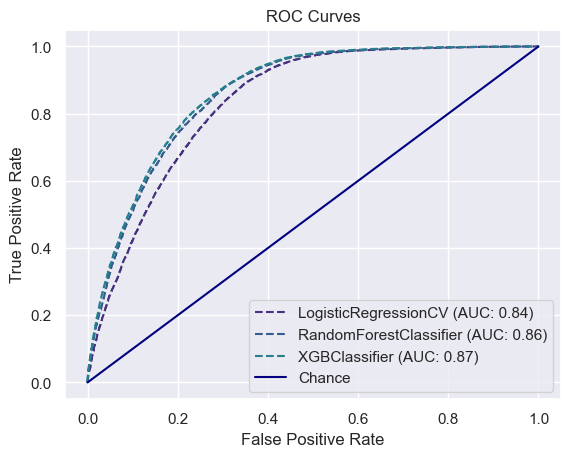

In [23]:
# run GridSearchCV for each model

for model_name, model in models.items():
	param_grid = param_grids[model_name]
	grid_search = GridSearchCV(model, param_grid, cv=4, scoring='roc_auc')
	grid_search.fit(x_train, y_train)

	print('Model:', model_name)
	print('Best parameters:', grid_search.best_params_)
	print('Best score:', grid_search.best_score_)
	print()

	y_prob = grid_search.predict_proba(x_test)[:,1]
	fpr, tpr, thresholds = roc_curve(y_test, y_prob)
	roc_auc = auc(fpr, tpr)
	plt.plot(fpr, tpr, linestyle='--', label='%s (AUC: %0.2f)' % (model_name, roc_auc))
plt.plot([0,1],[0,1], color='navy', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

In [24]:
y_pred = grid_search.predict(x_test)

In [25]:
roc_auc_score(y_test, y_pred)

0.7862348640988537

In [26]:
test[to_normalizer] = Normalizer.transform(test[to_normalizer])

In [27]:
y_pred_sub = grid_search.predict_proba(test)[:,1]

In [28]:
test_ID = pd.read_csv(r"C:\FCD\Competicoes_Kaggle\008_ML_Olympiad_Smoke_Prediction\test.csv")

In [29]:
submission = pd.DataFrame(test_ID['id'])

In [30]:
submission['smoking'] = y_pred_sub

In [31]:
submission.head()

,id,smoking
0,159256,0.621841
1,159257,0.671595
2,159258,0.425305
3,159259,0.015593
4,159260,0.647474


In [32]:
submission.to_csv('submission_xgb_v3.csv', index=False)